In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unzip -q "/content/drive/MyDrive/Data Folder1.zip"

In [ ]:
import os
import math
import tensorflow as tf
import glob
import cv2
import numpy as np
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input
import tensorflow.keras as keras
from tensorflow.keras import models,layers,optimizers,datasets
import numpy as np
from tensorflow import keras
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.utils import np_utils
from keras.models import load_model
from keras.preprocessing import image
import numpy as np 
import matplotlib.pyplot as plt
import glob
import cv2
from keras.models import Model, Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.layers import (
    BatchNormalization, SeparableConv2D, MaxPooling2D, Activation, Flatten, Dropout, Dense
)
import os

In [ ]:
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input

from keras.preprocessing.image import ImageDataGenerator
train_gen = ImageDataGenerator(validation_split=0.2, preprocessing_function=preprocess_input)
train_flow = train_gen.flow_from_directory("/content/Data Folder/train/", target_size=(256, 256), batch_size=130, subset="training")
valid_flow = train_gen.flow_from_directory("/content/Data Folder/val/", target_size=(256, 256), batch_size=130, subset="validation")

Found 28891 images belonging to 3 classes.
Found 3095 images belonging to 3 classes.


In [ ]:
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.resnet_v2 import ResNet152V2 

# example of loading the inception v3 model
from keras.applications.inception_v3 import InceptionV3
from keras.layers import GlobalAveragePooling2D, BatchNormalization, Dropout, Dense
from keras.models import Model


res = InceptionV3(weights='imagenet', include_top=False, input_shape=(256, 256, 3)) 

for layer in res.layers: 
  layer.trainable = False

x = res.output 
x = GlobalAveragePooling2D()(x)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)
x = Dense(512, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)
x = Dense(3, activation='softmax')(x)

model = Model(res.input, x) 
opt = tf.keras.optimizers.RMSprop(
    learning_rate=0.001 ,
    rho=0.8,
    momentum=0.2,
    epsilon=1e-07,
    centered=False,
    name="RMSprop"
)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy']) 

model.summary() 

87924736/87910968 [==============================] - 1s 0us/step
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 127, 127, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 127, 127, 32  96         ['conv2d[0][0]']                 
 alization)                  

In [ ]:
history = model.fit_generator(train_flow, epochs=10, validation_data=valid_flow)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  """Entry point for launching an IPython kernel.


Epoch 1/10
223/223 [==============================] - 222s 911ms/step - loss: 1.1571 - accuracy: 0.5482 - val_loss: 0.9683 - val_accuracy: 0.5816
Epoch 2/10
223/223 [==============================] - 195s 879ms/step - loss: 0.8732 - accuracy: 0.6266 - val_loss: 0.8246 - val_accuracy: 0.6507
Epoch 3/10
223/223 [==============================] - 196s 877ms/step - loss: 0.8280 - accuracy: 0.6483 - val_loss: 0.8346 - val_accuracy: 0.6349
Epoch 4/10
223/223 [==============================] - 197s 881ms/step - loss: 0.8042 - accuracy: 0.6573 - val_loss: 0.8268 - val_accuracy: 0.6504
Epoch 5/10
223/223 [==============================] - 197s 881ms/step - loss: 0.7963 - accuracy: 0.6600 - val_loss: 0.7984 - val_accuracy: 0.6717
Epoch 6/10
223/223 [==============================] - 197s 882ms/step - loss: 0.7885 - accuracy: 0.6677 - val_loss: 0.7996 - val_accuracy: 0.6617
Epoch 7/10
223/223 [==============================] - 197s 881ms/step - loss: 0.7822 - accuracy: 0.6703 - val_loss: 0.7880 -

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Unrecognized location 'lower_right'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  


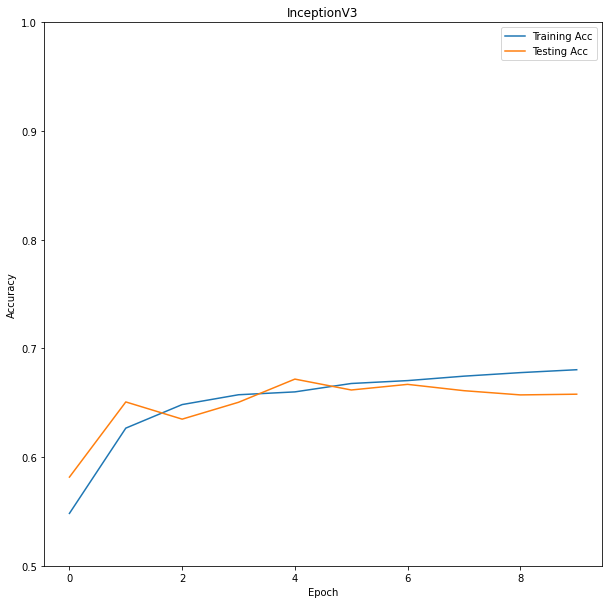

In [ ]:
plt.figure(figsize=(10,10))
plt.title("InceptionV3")
plt.plot(history.history['accuracy'], label='Training Acc')
plt.plot(history.history['val_accuracy'],label='Testing Acc')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5,1])
plt.legend(loc='lower_right')



In [ ]:
plt.savefig('inceptionv3.png', dpi=300, bbox_inches='tight')

<Figure size 432x288 with 0 Axes>